# <center>Structural Analysis and Visualization of Networks</center>

## <center>Home Assignment №4: Community Detection Algorithms

### <center>Student: *Ivanitskiy Ilya*</center>

#### <hr /> General Information

## Problems

### Task 1* (For those who have not done that during the seminar)

On this seminar your are asked to implement simple community detection algorightm. It is called [Markov Cluster Algorithm](http://micans.org/mcl/) (MCL).

Implement Markor Clustering Algorithm

**Input:** Transition matrix $T = D^{-1}A$

**Output:** Adjacency matrix $M^*$

1. Set $M = T$
2. **repeat:**
    3. *Expansion Step:* $M = M^p$ (usually $p=2$)
    4. *Inflation Step:* Raise every entry of $M$ to the power $\alpha$ (usualy $\alpha=2$)
    5. *Renormalize:* Normalize each row by its sum
    6. *Prunning:* Replace entries that are close to $0$ by pure $0$
7. **until** $M$ converges
8. $M^* = M$
<br\>
<br\>

As a result you should get a cluster matrix s.t. elements of the cluster correspont to nonzero elements of the columns of the matrix. 
<br\>
* Run this method for network [1](https://www.hse.ru/data/2016/03/15/1127695811/network1.mat), [2](https://www.hse.ru/data/2016/03/15/1127699956/network2.mat) and [3](https://www.hse.ru/data/2016/03/15/1127703057/network3.mat).
* Play with the parameters ($p$, $\alpha$, zero tolerance), analyse the results

<hr />


In [1]:
import numpy as np

In [2]:
import scipy.io
import scipy as sc
from scipy import sparse
from scipy.sparse import linalg 

In [3]:
import networkx as nx

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def MCL(data, p = 2, alpha = 2, threshold = 0.001):
    matrix = data
    matrix_old = np.eye(len(matrix))
    while (~(matrix_old == matrix).all()):
        matrix_old = matrix
# A. Expansion step
        for i in range(p-1):
            matrix = np.dot(matrix, matrix)
            
# B. Inflation step
        matrix = np.power(matrix,alpha)
        
# C. Renormalize
        matrix = np.array(matrix, dtype=np.float)
        norma_of_matrix = np.sum(matrix, axis=1)
        for i in range(len(matrix)):
            matrix[i] = matrix[i] / norma_of_matrix[i]
            
# D. Prunning
        matrix[matrix < threshold] = 0
        
    matrix_star = matrix
    
    return matrix_star

## Firstly looking on our standart graph - Zachary's Karate Club

In [3]:
G = nx.karate_club_graph()
A = nx.adj_matrix(G).toarray()
d = G.degree().values()
D = np.diag(d)
T = np.dot(np.linalg.inv(D), A)

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


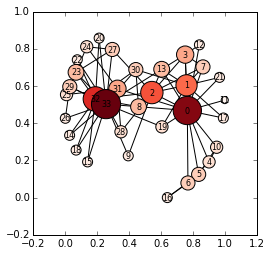

In [4]:
k = nx.degree(G)
plt.figure(1, figsize = (4,4))
coord = nx.spring_layout(G)
nx.draw_networkx(G,
                 pos=coord,
                 nodelist=k.keys(),
                 node_size = [d*50 for d in k.values()],
                 node_color=k.values(),
                 font_size=8,
                 cmap=plt.cm.Reds,
                 )

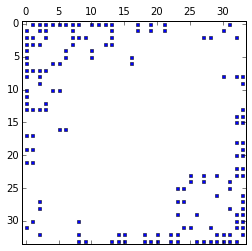

In [5]:
plt.spy(nx.adj_matrix(G), markersize = 3)

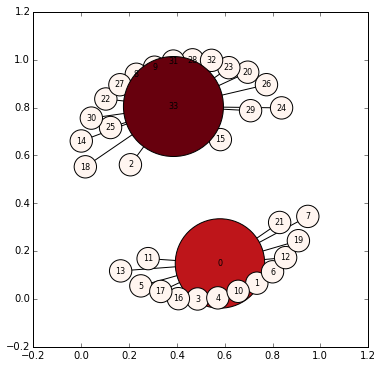

In [6]:
ans = MCL(T)

graph_temp = nx.from_numpy_matrix(ans)
k = nx.degree(graph_temp)
plt.figure(1, figsize=(6,6))
coord = nx.spring_layout(graph_temp)
nx.draw_networkx(graph_temp,
                 pos=coord,
                 nodelist=k.keys(),
                 node_size = [d*500 for d in k.values()],
                 node_color=k.values(),
                 font_size=8,
                 cmap=plt.cm.Reds,
                 )

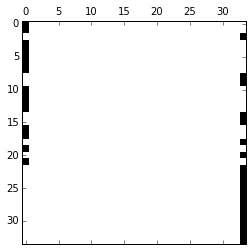

In [7]:
plt.spy(ans)

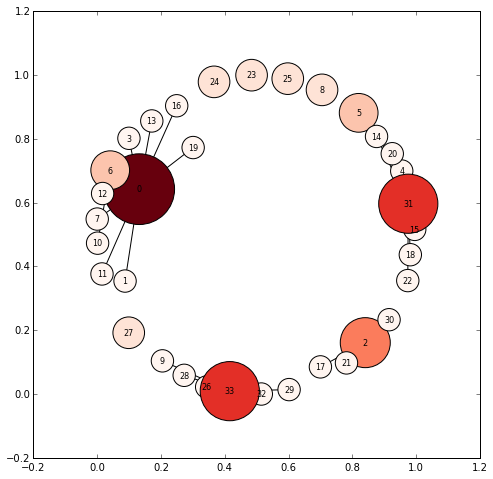

In [8]:
ans = MCL(T,alpha = 4)

graph_temp = nx.from_numpy_matrix(ans)
k = nx.degree(graph_temp)
plt.figure(1, figsize = (8,8))
coord = nx.spring_layout(graph_temp)
nx.draw_networkx(graph_temp,
                 pos=coord,
                 nodelist=k.keys(),
                 node_size = [d*500 for d in k.values()],
                 node_color=k.values(),
                 font_size=8,
                 cmap=plt.cm.Reds,
                 )

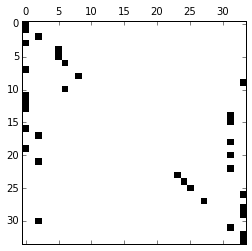

In [9]:
plt.spy(ans)

> Amazing result! 
As we see, in columns we cummulate our cluster, so with number of nonzero columns we can find # of clusters

> with param p>=3 we get only 1 cluster, 

In [7]:
data = scipy.io.loadmat('network1.mat')
matrix_1 = data['A']

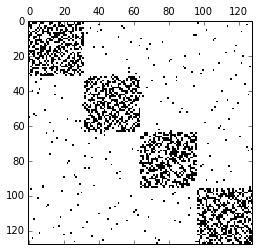

In [8]:
plt.spy(matrix_1)

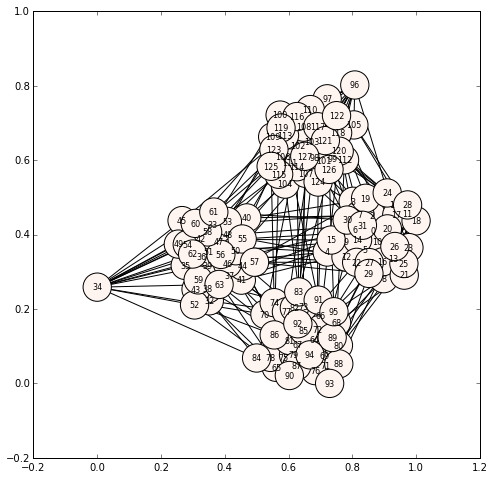

In [12]:
G_ = nx.from_numpy_matrix(matrix_1)
k = nx.degree(G_)
plt.figure(1, figsize=(8,8))
coord = nx.spring_layout(G_)
nx.draw_networkx(G_,
                 pos=coord,
                 nodelist=k.keys(),
                 node_size = [d*50 for d in k.values()],
                 node_color=k.values(),
                 font_size=8,
                 cmap=plt.cm.Reds,
                 )

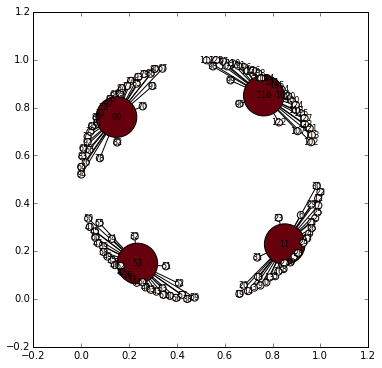

In [13]:
G_ = nx.from_numpy_matrix(MCL(matrix_1))
k = nx.degree(G_)
plt.figure(1, figsize=(6,6))
coord = nx.spring_layout(G_)
nx.draw_networkx(G_,
                 pos=coord,
                 nodelist=k.keys(),
                 node_size = [d*50 for d in k.values()],
                 node_color=k.values(),
                 font_size=8,
                 cmap=plt.cm.Reds,
                 )

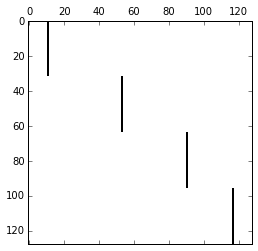

In [14]:
plt.spy(MCL(matrix_1)) 
# We can find 4 clusters on this graph

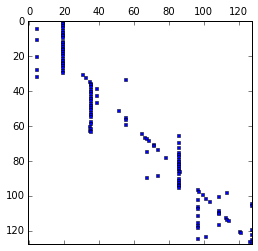

In [15]:
plt.spy(MCL(matrix_1, p = 2, alpha = 4), markersize=3)

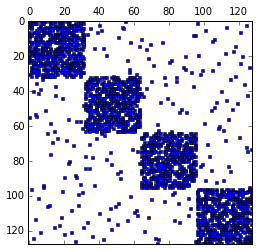

In [16]:
plt.spy(MCL(matrix_1, p = 1, alpha = 8), markersize=3)  
# So pretty visualization

In [17]:
plt.spy(MCA(matr1,alph=2.2, p=1), markersize=3)
# it's infinite loop

KeyboardInterrupt: 

> Standart values of the params in our implementation of MCA gives us the nature cluster in first data set -  4 cluster

______

In [18]:
data = scipy.io.loadmat('network2.mat')
matrix_2 = data['A']

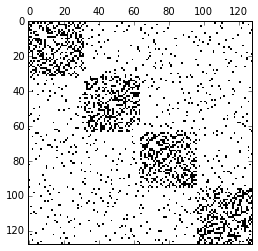

In [19]:
plt.spy(matrix_2)

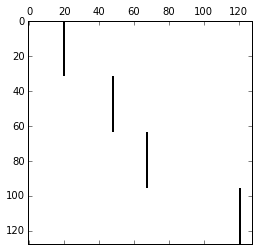

In [20]:
plt.spy(MCL(matrix_2))

> So, in the picture we see the equal with previous results.

In [21]:
data = scipy.io.loadmat('network3.mat')
matrix_3 = data['A']

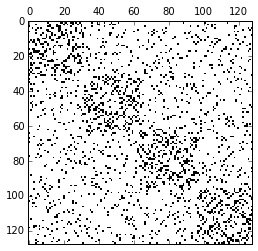

In [22]:
plt.spy(matrix_3) 
# So noisy dataset. By eyes, we don't see any clusters.

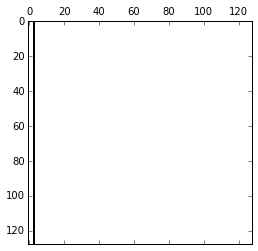

In [23]:
plt.spy(MCL(matrix_3))

> in more noisy data MCA with standart params(in our implementation) gives us pretty nice results  - 4 cluster

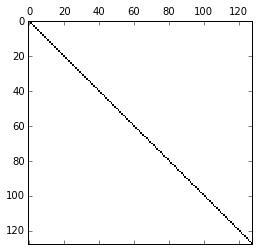

In [24]:
plt.spy(MCL(matrix_3, alpha = 2.6)) 

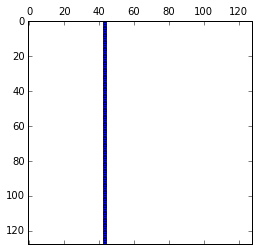

In [104]:
plt.spy(MCL(matrix_3, alpha = 3, p = 3, threshold = 0.001), markersize=3) 
# All edges in one cluster

In [26]:
plt.spy(MCA(matr3,alph=2.2, p=1), markersize=3) 
# it's infinite loop

KeyboardInterrupt: 

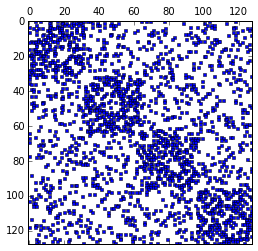

In [54]:
plt.spy(MCL(matrix_3, alpha = 10, p = 1), markersize=3)
# So, data is so noisy, but we can find any clusters

_______

### Task 2

Load [Yahoo Music network](https://www.hse.ru/data/2016/03/15/1127704844/music_data.mat). Edges in this network appear if enough number of users have given ratings to both music bands. Note, that edges are weighted with similarity of the ratings.

* Implement *multilevel spectral recursive partitioning* algorithm that was described during the lecture
* Visualize community structure of the network and output some of the dense clusters (with interpretation, if you can)

You can load .mat files with the following commands:

In [ ]:
data = scipy.io.loadmat('music_data.mat')

In [ ]:
# How we can see below, data is so noisy (for first vision). But we can pick out clusters.

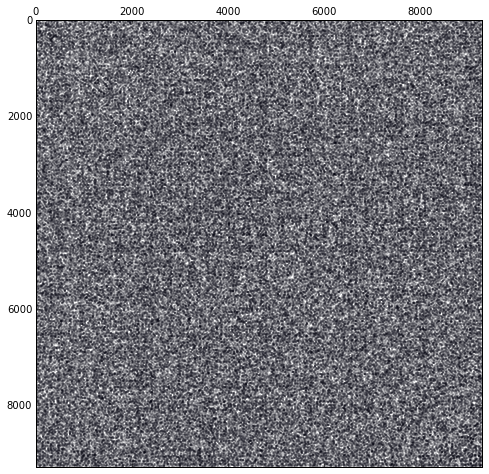

In [2]:
matrix = data['A'].astype('float')
matrix[matrix>0] = 1
matrix[matrix<0] = 0
plt.figure(figsize = (8,8))
plt.spy(matrix, markersize = 0.2)

In [3]:
def density(matrix):
    return len(matrix.nonzero()[0]) / (float(1) * matrix.shape[0] * (matrix.shape[0]-1))

In [4]:
threshold = density(matrix)
print(threshold)

0.0034937449802347653

In [5]:
def spectral_clustering_1(mat, clusters):
    const_density = 0.95
    const_num = 1500
    
    diag = mat.sum(axis = 1) 
    # create diagonal vector, power of each node
    shape = mat.shape 
    # just obtain count of nodes
    d = np.zeros(shape)
    np.fill_diagonal(d,diag)
    d = sc.sparse.csr_matrix(d) 
    # np.matrix 2 sparse format
    l = d - mat
    la, v = sc.sparse.linalg.eigsh(l, k = 2, M = d, which = 'SM') 
    # compute two first eig vectors
    # values for general eig problem 
    
    y_matrix = v[:,np.argmax(la)] 
    # just take second minimal eigenvector 
    # because 1st minimal == 0
    order = np.argsort(y_matrix) 
    # order - sorted by value eigenvector indexes
    
    mat = mat[:,order]
    mat = mat[order, :]

    y_matrix = np.sign(y_matrix[order])
    i = 0
    for j in range(len(y_matrix)):
        if y_matrix[j] > 0:
            i = j
            break
    
    if density(mat[:i, :i]) < const_density and mat[:i, :i].shape[0] > const_num:
        mat[:i, :i], new_ord, clusters = spectral_clustering_1(mat[:i, :i],clusters)
        order[:i] = order[:i][new_ord]
    else:
        all_clusters.append(order[:i][:])
    
    if density(mat[i:, i:]) < const_density and mat[i:, i:].shape[0] > const_num:
        mat[i:, i:], new_ord, clusters = spectral_clustering_1(mat[i:, i:],clusters)
        order[i:] = order[i:][new_ord]
    else:
        clusters.append(order[i:][:])
    
    return mat, order,clusters

/usr/local/lib/python2.7/site-packages/scipy/sparse/compressed.py:730: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


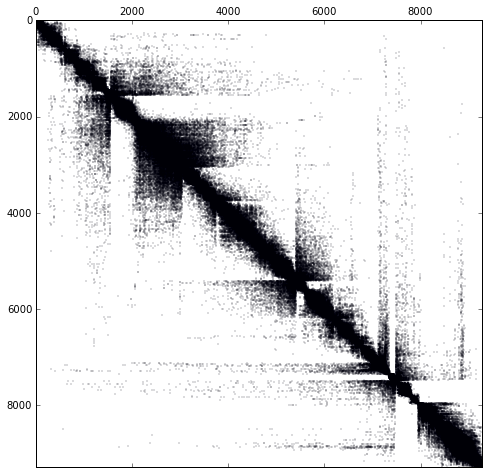

In [7]:
clusters = []
X, order, all_clusters = spectral_clustering_1(matrix, clusters)
plt.figure(figsize = (8,8))
plt.spy(X, markersize = 0.2)

In [8]:
clusters = np.array(clusters)

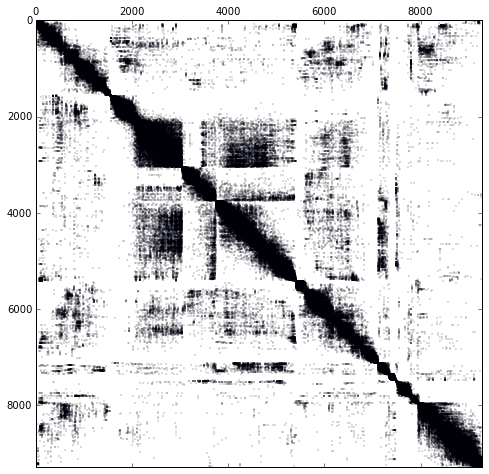

In [10]:
plt.figure(figsize = (8,8))
temp_m = matrix[:,order]
temp_m = temp_m[order,:]
plt.spy(temp_m, markersize = 0.2)

In [5]:
# Just print all members of each cluster

In [12]:
for clst in clusters:
    print data['artists'][clst][:10]

[u'Wu-Syndicate                                       '
 u'Angela Bofill                                      '
 u'Oregon                                             '
 u'Drain S.T.H.                                       '
 u'Sneaker Pimps                                      '
 u'Guided By Voices                                   '
 u'The Dead Boys                                      '
 u'Smoke City                                         '
 u'Godspeed You Black Emperor                         '
 u'Tela                                               ']
[u'C-Murder                                           '
 u'T-Bone Burnett                                     '
 u'Radiohead                                          '
 u'Russell Malone                                     '
 u'New Found Glory                                    '
 u'Finn Brothers                                      '
 u'Jupiter Sunrise                                    '
 u'White Town                                  

## <center>This is the end</center>